In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/my-first-input/"
print("data path: ", data_path)

level: level1 & tutorial name: lennard-jones-fluid
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/lennard-jones-fluid/my-first-input/


In [3]:
log = lammps_logfile.File(data_path + "log.lammps")
timestep = 0.005
Time_EM = log.get("Step", run_num = 0)*timestep
PotEng_EM = log.get("TotEng", run_num = 0) # its the same if Kin En = 0
Time_MD = log.get("Step", run_num = 1)*timestep
PotEng_MD = log.get("PotEng", run_num = 1)
KinEng_MD = log.get("KinEng", run_num = 1)

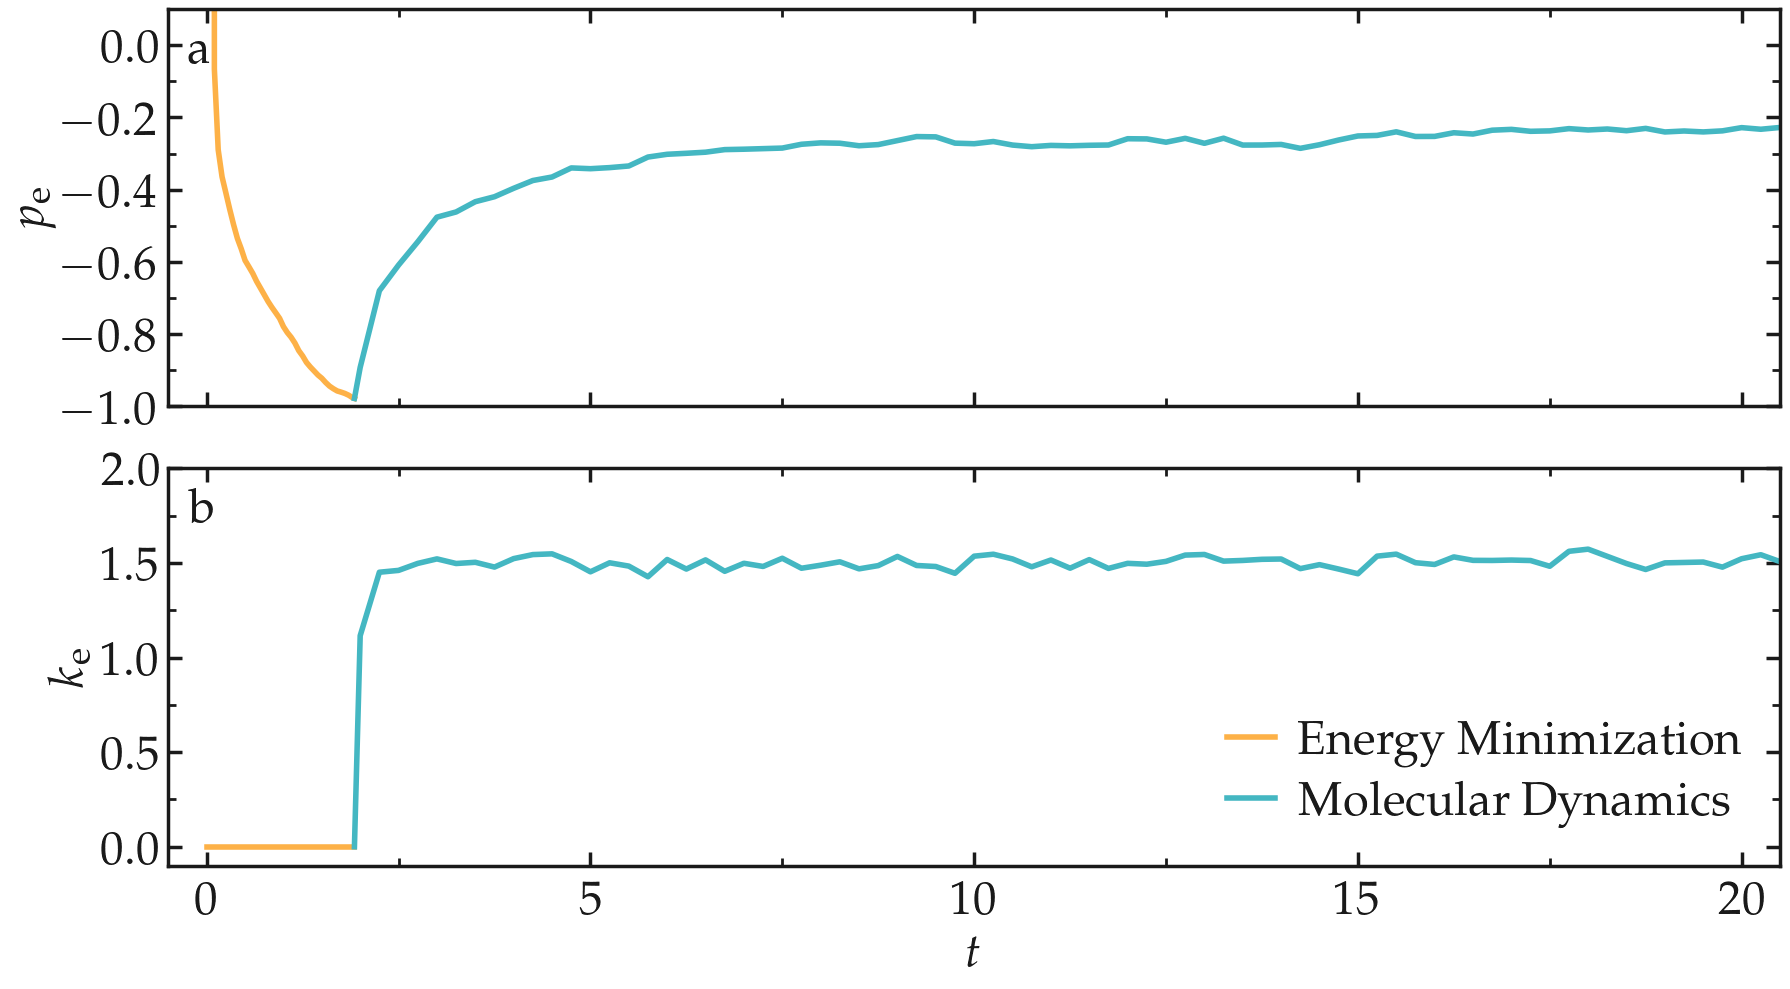

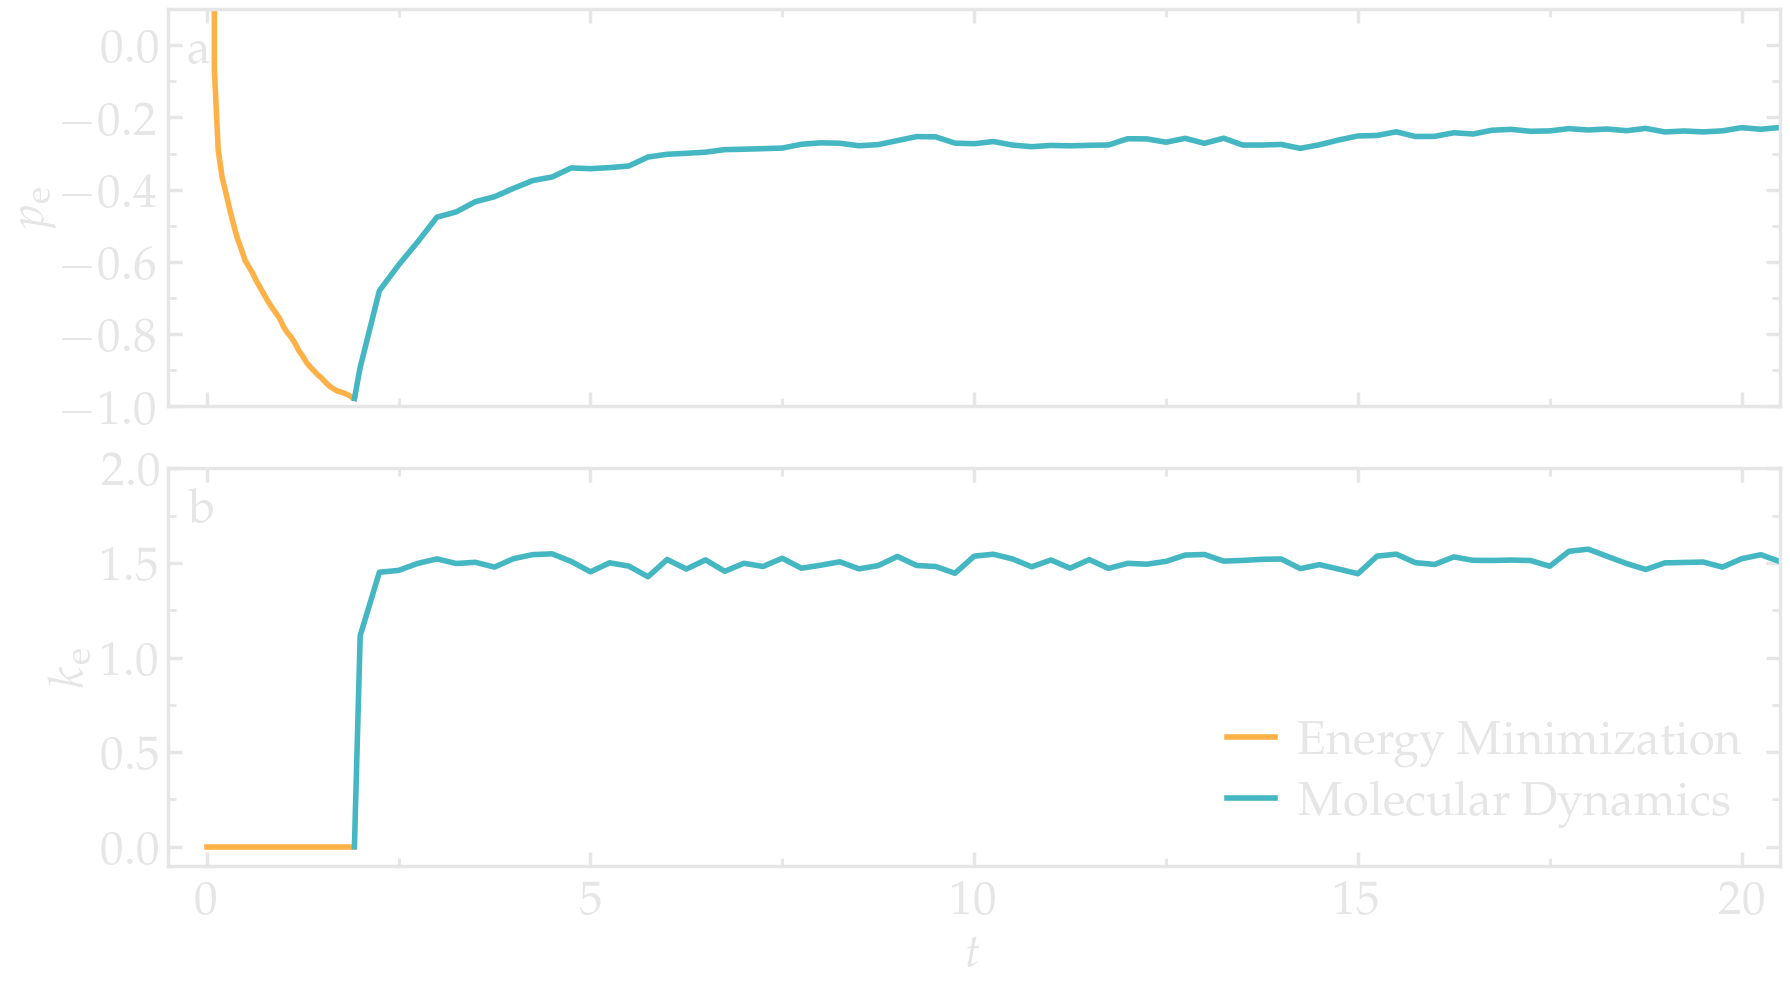

In [7]:
filename = "energy"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,10), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=2)
    myplt.add_panel()
    myplt.add_plot(x = Time_EM, y = PotEng_EM, linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12,
                   data_label = r'$E_{12}$')
    myplt.add_plot(x = Time_MD, y = PotEng_MD, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = r'$E_{12}$')
    myplt.complete_panel(ylabel = r'$p_\mathrm{e}$', xlabel = None,
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 25, 5), x_boundaries=(-0.5, 20.5),
                         y_ticks=np.arange(-1, 0.2, 0.2), y_boundaries=(-1, 0.1))
    myplt.add_panel()
    myplt.add_plot(x = Time_EM, y = PotEng_EM*0, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12,
                   data_label = r'$\mathrm{Energy~Minimization}$')
    myplt.add_plot(x = Time_MD, y = KinEng_MD, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = r'$\mathrm{Molecular~Dynamics}$')
    myplt.complete_panel(ylabel = r'$k_\mathrm{e}$', xlabel = r'$t$',
                         xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 25, 5), x_boundaries=(-0.5, 20.5),
                         y_ticks=np.arange(-0, 2.5, 0.5), y_boundaries=(-0.1, 2))
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')